# **선형회귀**

In [1]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')

### 1. 필요한 데이터프레임 가져오기 (2차원 데이터로 가져와야댐)

In [21]:
perch_df = df.loc[df['Species'] == 'Perch']
# 학습시킬때 2차원으로 해야댐(데이터프레임 형태) 대괄호 두개
perch_length = perch_df[['Length2']]
perch_weight = perch_df[['Weight']]
#perch_length

### 2. 훈련데이터와 test데이터 split하기

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight)

### 3. 선형회귀 모델에 적합시키기

In [25]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() #인스턴스화 시켜주기

lr.fit(train_input, train_target)

LinearRegression()

### 4. test데이터 점수내기

In [20]:
lr.score(test_input, test_target)

0.8219037999871147

In [23]:
lr.predict([[100]]) #k최근접이웃에서는 length가 매우 커져도 항상 똑같았지만 선형회귀에서는 length가 커지는 만큼 weight도 커진다

C:\Users\1-15\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[3246.96788983]])

In [36]:
# 가중치(계수, 기울기)
lr.coef_

array([[39.89072432]])

In [31]:
# y절편
lr.intercept_  ### y = 39.89x - 742.104

array([-742.1045426])

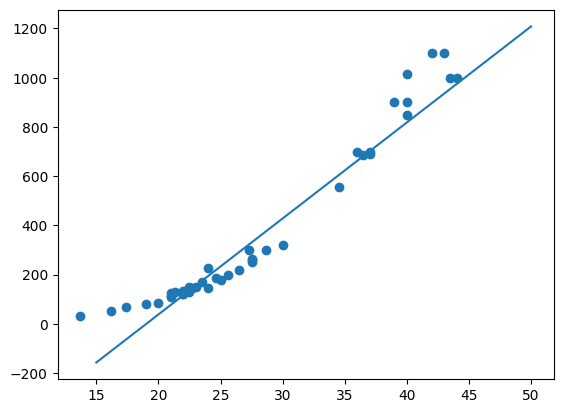

In [35]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)
plt.plot([15,50], [15 * 39 - 742, 50 * 39 - 742])

In [41]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9438828081988864
0.8219037999871147


### 선형회귀의 문제점

In [45]:
lr.predict([[1]]) #무게가 음수로 나옴

C:\Users\1-15\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-702.21381828]])

# **다항회귀**
- y = ax^2 + bx + c
- 독립변수의 차수를 높인다
- 곡선 데이터에 적합하다

### x^2 생성

In [49]:
train_input['Length2_poly'] = train_input['Length2'] ** 2
test_input['Length2_poly'] = test_input['Length2'] ** 2
train_input.head()

,Length2,Length2_poly
120,40.0,1600.00
127,44.0,1936.00
89,22.0,484.00
126,43.5,1892.25
79,19.0,361.00


In [51]:
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [52]:
lr.score(test_input, test_target)

0.9416269633913391

In [58]:
lr.predict([[2, 4]])  # 무게가 음수로 나오는 문제를 해결

C:\Users\1-15\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[142.08435213]])

In [61]:
print(lr.coef_,lr.intercept_)  # y = ax^2 + bx + c   => y = 1.11x^2 -27x + 192
# 2차원이니까 모수가 3개가 출력된다

[[-27.32581755   1.11131702]] [192.29071915]
